In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

In [59]:
(x_train,y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

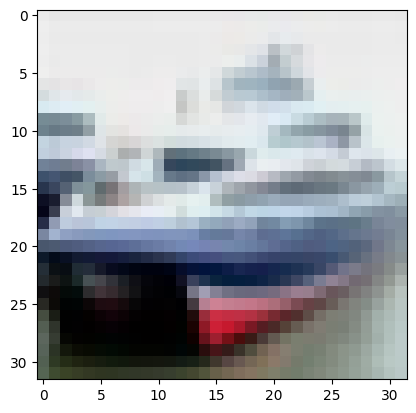

In [60]:
plt.imshow(x_test[1])

In [61]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [62]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [63]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [64]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

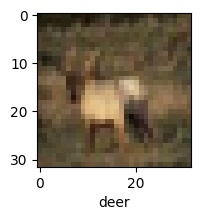

In [65]:
plot_sample(x_train,y_train,3)

In [66]:
x_train = x_train/255.0
x_test = x_test/255.0

In [67]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer="SGD",
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

c:\Users\oband\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3025 - loss: 1.9340
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4184 - loss: 1.6516
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4502 - loss: 1.5585
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4733 - loss: 1.4951
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4984 - loss: 1.4343


In [68]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.47      0.51      1000
           1       0.65      0.53      0.59      1000
           2       0.42      0.29      0.34      1000
           3       0.40      0.17      0.24      1000
           4       0.45      0.40      0.42      1000
           5       0.34      0.51      0.41      1000
           6       0.46      0.63      0.53      1000
           7       0.57      0.51      0.54      1000
           8       0.49      0.75      0.59      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [69]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer="adam",
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

c:\Users\oband\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3915 - loss: 1.6939
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5714 - loss: 1.2255
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6268 - loss: 1.0722
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6543 - loss: 0.9850
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6758 - loss: 0.9226
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7018 - loss: 0.8558
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7156 - loss: 0.8174
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7338 - loss: 0.7677
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7399 - loss: 0.7388
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7528 - loss: 0.6990


In [70]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6548 - loss: 1.0472


[1.0617711544036865, 0.6527000069618225]

In [71]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.0059355e-03, 1.7959594e-05, 2.3364327e-03, 9.3682849e-01,
        4.5228805e-03, 3.7370294e-02, 1.6577063e-02, 1.2814888e-05,
        1.3219446e-03, 6.1571936e-06],
       [1.4509134e-03, 9.7983934e-02, 1.7557852e-06, 8.0366508e-06,
        3.7513232e-08, 1.5752494e-08, 5.2093490e-08, 2.0573891e-10,
        9.0009451e-01, 4.6078107e-04],
       [8.7368977e-01, 1.2474061e-02, 3.4356806e-03, 6.5713719e-04,
        2.3322800e-04, 1.0084568e-05, 8.1698519e-05, 5.7797367e-04,
        1.0181911e-01, 7.0212181e-03],
       [6.6585231e-01, 7.8601029e-04, 2.3051020e-02, 3.3532715e-04,
        1.0589657e-03, 2.4565552e-06, 1.8057449e-03, 2.6124682e-05,
        3.0692655e-01, 1.5549875e-04],
       [2.0565765e-06, 5.5195787e-06, 4.4764872e-03, 7.8532241e-02,
        2.5556009e-02, 6.3330593e-04, 8.9079124e-01, 5.7793901e-08,
        3.1148261e-06, 5.7009345e-08]], dtype=float32)

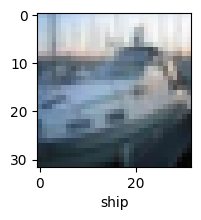

In [73]:
plot_sample(x_test,y_test,2)